# Import the necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

for dirname, _, filenames in os.walk('/content/F1'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/F1/qualifying.csv
/content/F1/results.csv
/content/F1/constructor_standings.csv
/content/F1/circuits.csv
/content/F1/sprint_results.csv
/content/F1/races.csv
/content/F1/constructors.csv
/content/F1/driver_standings.csv
/content/F1/status.csv
/content/F1/lap_times.csv
/content/F1/constructor_results.csv
/content/F1/pit_stops.csv
/content/F1/seasons.csv
/content/F1/drivers.csv


# Exploratory Data Analysis

In [3]:
DIR_PATH = '/content/F1'

# Define a function to load and display the first five rows of each data set
def load_and_preview_csv(file_name, dir_path):
    file_path = os.path.join(dir_path, file_name)
    df = pd.read_csv(file_path)
    return df.head(), df.info(), df.describe()

# Load and preview all the data sets
data_preview = {}
for file in filenames:
    data_preview[file] = load_and_preview_csv(file, DIR_PATH)

# Display the keys to check all data sets are loaded
data_preview.keys()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10234 entries, 0 to 10233
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   qualifyId      10234 non-null  int64 
 1   raceId         10234 non-null  int64 
 2   driverId       10234 non-null  int64 
 3   constructorId  10234 non-null  int64 
 4   number         10234 non-null  int64 
 5   position       10234 non-null  int64 
 6   q1             10234 non-null  object
 7   q2             10221 non-null  object
 8   q3             10207 non-null  object
dtypes: int64(6), object(3)
memory usage: 719.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26499 entries, 0 to 26498
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26499 non-null  int64  
 1   raceId           26499 non-null  int64  
 2   driverId         26499 non-null  int64  
 3   constructorId    26499 

dict_keys(['qualifying.csv', 'results.csv', 'constructor_standings.csv', 'circuits.csv', 'sprint_results.csv', 'races.csv', 'constructors.csv', 'driver_standings.csv', 'status.csv', 'lap_times.csv', 'constructor_results.csv', 'pit_stops.csv', 'seasons.csv', 'drivers.csv'])

In [4]:
# Load the races data set
races_df = pd.read_csv('/content/F1/races.csv')

# Visualize the number of races per season
races_per_season = races_df.groupby('year').value_counts().reset_index()
races_per_season['number_of_races'] = races_per_season.groupby('year')['year'].transform('count')
races_per_season = races_per_season.sort_values(by='year')

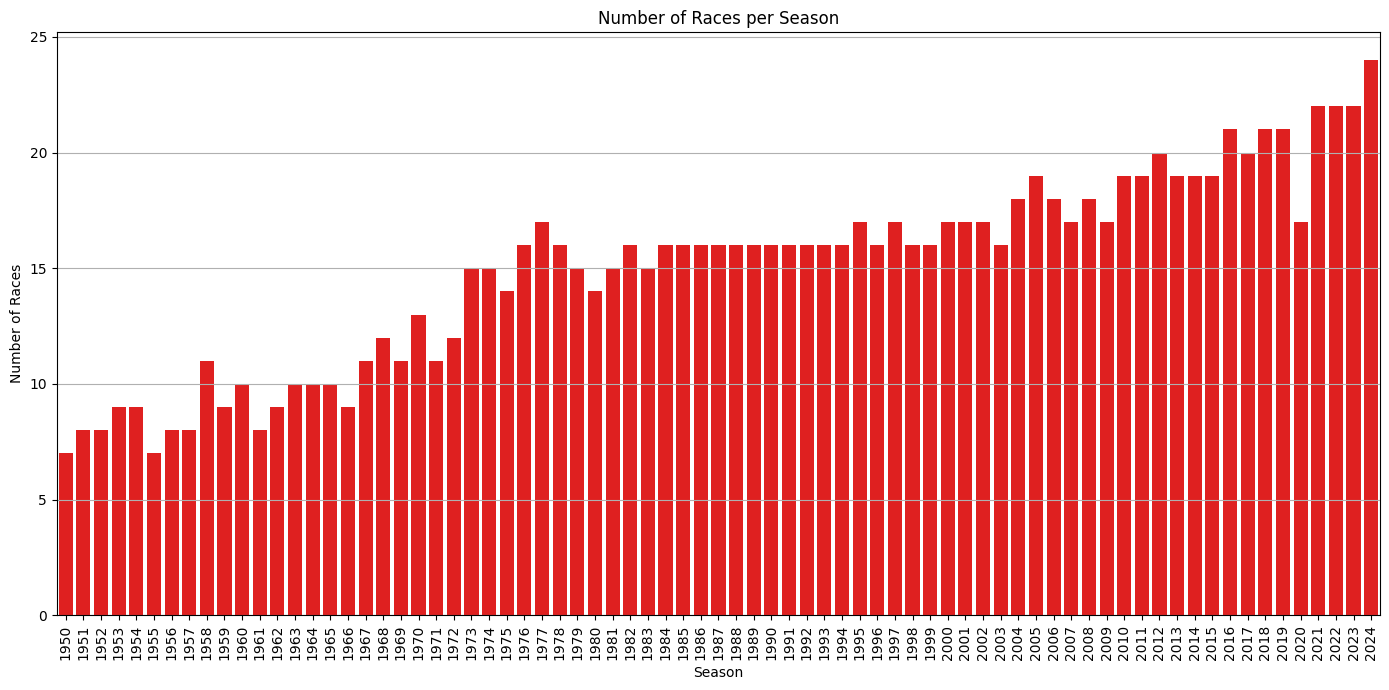

In [5]:
# Bar chart for number of races per season
plt.figure(figsize=(14, 7))
sns.barplot(data=races_per_season, x='year', y='number_of_races', color='red') # red colored bars indicates the theme of F1 (red)
plt.title('Number of Races per Season')
plt.xlabel('Season')
plt.ylabel('Number of Races')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()

plt.show()

In [6]:
# Load the driver standings and drivers data sets
driver_standings_df = pd.read_csv('/content/F1/driver_standings.csv')
drivers_df = pd.read_csv('/content/F1/drivers.csv')

# Merge both the data sets to get the driver names
merged_driver_standings = pd.merge(driver_standings_df, drivers_df, on='driverId')

In [7]:
# Filter to include drivers with only podium finishes (i.e positions 1, 2 and 3)
top_driver_standings = merged_driver_standings[merged_driver_standings['position'].isin([1, 2, 3])]
top_driver_standings

,driverStandingsId,raceId,driverId,points,position,positionText,wins,driverRef,number,code,forename,surname,dob,nationality,url
0,1,18,1,10.0,1,1,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,9,19,1,14.0,1,1,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
2,27,20,1,14.0,3,3,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
3,48,21,1,20.0,2,2,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
4,69,22,1,28.0,3,3,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34131,70534,1063,846,113.0,3,3,0,norris,4,NOR,Lando,Norris,1999-11-13,British,http://en.wikipedia.org/wiki/Lando_Norris
34192,72772,1128,846,113.0,3,3,1,norris,4,NOR,Lando,Norris,1999-11-13,British,http://en.wikipedia.org/wiki/Lando_Norris
34193,72793,1129,846,131.0,3,3,1,norris,4,NOR,Lando,Norris,1999-11-13,British,http://en.wikipedia.org/wiki/Lando_Norris
34194,72814,1130,846,150.0,2,2,1,norris,4,NOR,Lando,Norris,1999-11-13,British,http://en.wikipedia.org/wiki/Lando_Norris


In [8]:
# Create a count of drivers with only podium finishes
top_driver_counts = top_driver_standings.groupby('surname').value_counts().reset_index()
top_driver_counts['podiums'] = top_driver_counts.groupby('surname')['surname'].transform('count')
top_driver_counts = top_driver_counts.sort_values(by='podiums', ascending=False)
top_driver_counts

,surname,driverStandingsId,raceId,driverId,points,position,positionText,wins,driverRef,number,code,forename,dob,nationality,url,count,podiums
962,Hamilton,67801,958,1,192.0,1,1,5,hamilton,44,HAM,Lewis,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,233
943,Hamilton,68670,991,1,45.0,2,2,0,hamilton,44,HAM,Lewis,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,233
945,Hamilton,68730,993,1,95.0,1,1,2,hamilton,44,HAM,Lewis,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,233
946,Hamilton,68393,980,1,213.0,2,2,5,hamilton,44,HAM,Lewis,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,233
947,Hamilton,68750,994,1,110.0,1,1,2,hamilton,44,HAM,Lewis,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,Cross,44757,809,656,6.0,3,3,0,cross,\N,\N,Art,1918-01-24,American,http://en.wikipedia.org/wiki/Art_Cross,1,1
364,Bonnier,62041,758,347,8.0,2,2,1,bonnier,\N,\N,Jo,1930-01-31,Swedish,http://en.wikipedia.org/wiki/Joakim_Bonnier,1,1
1803,Parsons,43288,835,593,9.0,3,3,1,parsons,\N,\N,Johnnie,1918-07-04,American,http://en.wikipedia.org/wiki/Johnnie_Parsons,1,1
1391,Ireland,50090,753,404,12.0,3,3,0,ireland,\N,\N,Innes,1930-06-12,British,http://en.wikipedia.org/wiki/Innes_Ireland,1,1


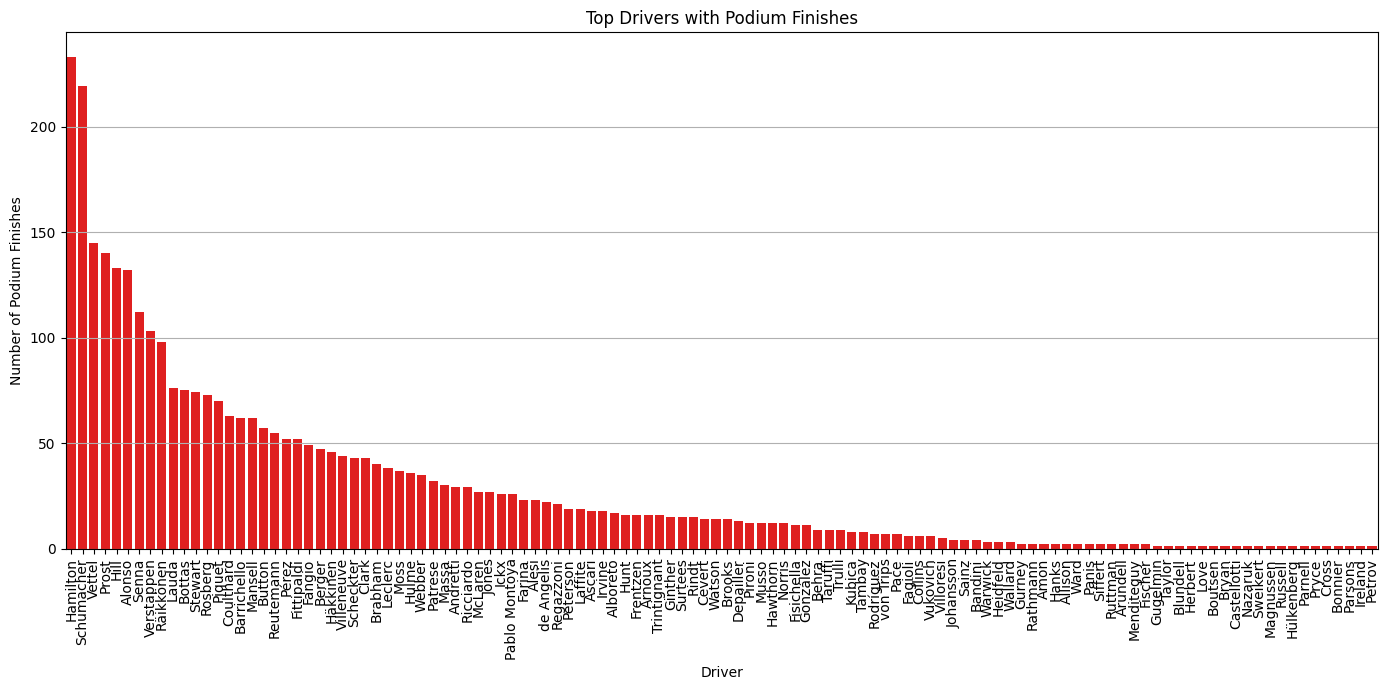

In [9]:
# Create a bar chart for drivers and their podium finishes
plt.figure(figsize=(14, 7))
sns.barplot(data=top_driver_counts, x='surname', y='podiums', color='red')
plt.title('Top Drivers with Podium Finishes')
plt.xlabel('Driver')
plt.ylabel('Number of Podium Finishes')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()

plt.show()

In [10]:
# Load the constructor standings and constructors data sets
constructor_standings_df = pd.read_csv('/content/F1/constructor_standings.csv')
constructors_df = pd.read_csv('/content/F1/constructors.csv')

# Merge both the data sets to get the constructor names
merged_constructor_standings = pd.merge(constructor_standings_df, constructors_df, on='constructorId')

In [11]:
# Filter to include constructors with only podium finishes
top_constructor_standings = merged_constructor_standings[merged_constructor_standings['position'].isin([1, 2, 3])]
top_constructor_standings

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,constructorRef,name,nationality,url
0,1,18,1,14.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,7,19,1,24.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
2,18,20,1,28.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
3,29,21,1,34.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
4,40,22,1,42.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
...,...,...,...,...,...,...,...,...,...,...,...
13078,27536,1036,211,63.0,3,3,0,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
13083,27596,1041,211,120.0,3,3,0,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
13084,27606,1042,211,126.0,3,3,0,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
13086,27626,1044,211,154.0,3,3,0,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team


In [12]:
# Create a count of constructors with only podium finishes
top_constructor_counts = top_constructor_standings.groupby('name').value_counts().reset_index()
top_constructor_counts['podiums'] = top_constructor_counts.groupby('name')['name'].transform('count')
top_constructor_counts = top_constructor_counts.sort_values(by='podiums', ascending=False)
top_constructor_counts

,name,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,constructorRef,nationality,url,count,podiums
643,Ferrari,17780,768,6,14.0,2,2,0,ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari,1,782
524,Ferrari,5537,184,6,90.0,1,1,5,ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari,1,782
552,Ferrari,1545,167,6,92.0,2,2,5,ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari,1,782
553,Ferrari,1556,168,6,102.0,2,2,6,ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari,1,782
554,Ferrari,1567,169,6,111.0,2,2,6,ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari,1,782
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,Fittipaldi,11307,498,56,4.0,3,3,0,fittipaldi,Brazilian,http://en.wikipedia.org/wiki/Fittipaldi_%28con...,1,1
1233,Haas F1 Team,28135,1074,210,10.0,3,3,0,haas,American,http://en.wikipedia.org/wiki/Haas_F1_Team,1,1
1236,Honda,20737,679,11,4.0,3,3,0,honda,Japanese,http://en.wikipedia.org/wiki/Honda_Racing_F1,1,1
1395,Matra,21685,633,82,6.0,3,3,0,matra,French,http://en.wikipedia.org/wiki/Matra,1,1


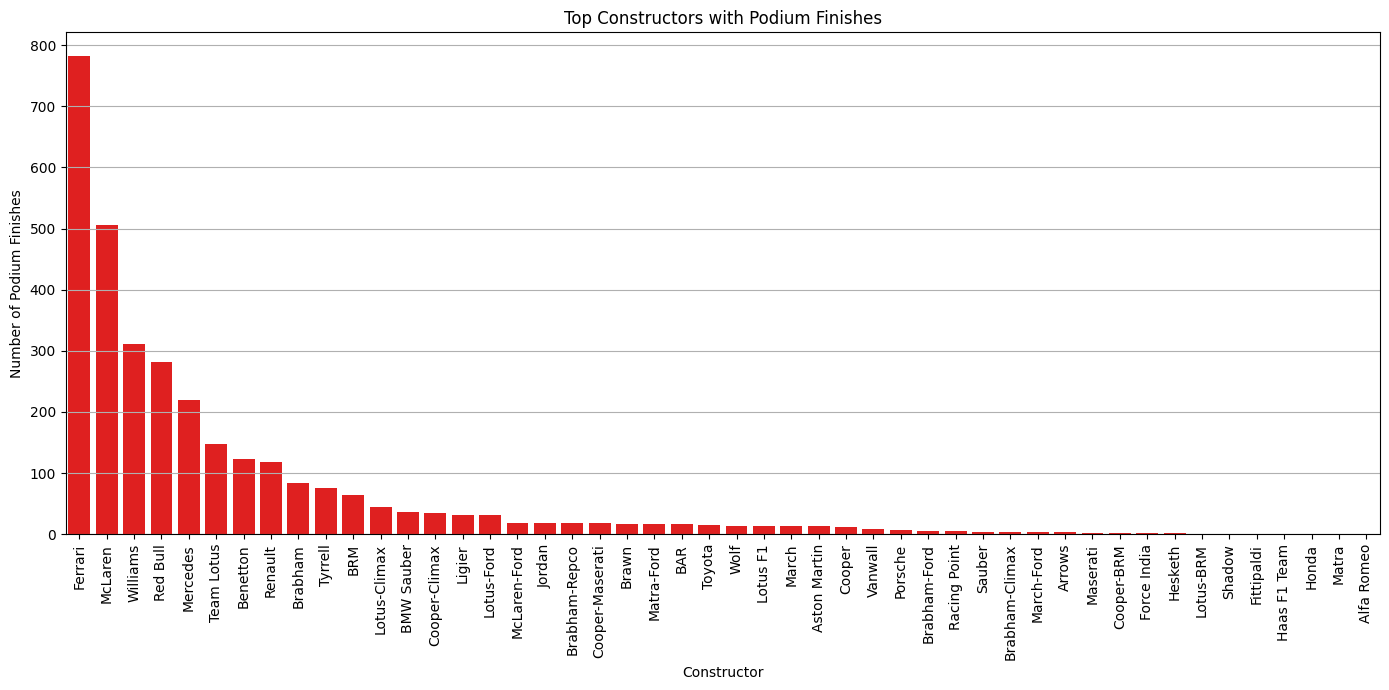

In [13]:
# Create a bar chart for constructors with only podium finishes
plt.figure(figsize=(14, 7))
sns.barplot(data=top_constructor_counts, x='name', y='podiums', color='red')
plt.title('Top Constructors with Podium Finishes')
plt.xlabel('Constructor')
plt.ylabel('Number of Podium Finishes')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()

plt.show()

# Driver Performance Analysis with Regression

In [14]:
# Load the races, drivers and results data sets
races_df = pd.read_csv('/content/F1/races.csv')
drivers_df = pd.read_csv('/content/F1/drivers.csv')
results_df = pd.read_csv('/content/F1/results.csv')

# Merge the data sets to create a comprehensive data set
merged_df = results_df.merge(races_df, on='raceId').merge(drivers_df, on='driverId')

In [15]:
merged_df.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number_x', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time_x',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'year', 'round', 'circuitId', 'name',
       'date', 'time_y', 'url_x', 'fp1_date', 'fp1_time', 'fp2_date',
       'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time',
       'sprint_date', 'sprint_time', 'driverRef', 'number_y', 'code',
       'forename', 'surname', 'dob', 'nationality', 'url_y'],
      dtype='object')

In [16]:
# Select relevant columns for analysis
columns = ['raceId', 'year', 'round', 'circuitId', 'driverId', 'constructorId', 'grid', 'positionOrder', 'points', 'laps', 'milliseconds', 'fastestLap', 'fastestLapTime', 'fastestLapSpeed', 'statusId']

# Create a new dataframe with selected columns
driver_performance_df = merged_df[columns]
driver_performance_df

,raceId,year,round,circuitId,driverId,constructorId,grid,positionOrder,points,laps,milliseconds,fastestLap,fastestLapTime,fastestLapSpeed,statusId
0,18,2008,1,1,1,1,1,1,10.0,58,5690616,39,1:27.452,218.300,1
1,19,2008,2,2,1,1,9,5,4.0,56,5525103,53,1:35.462,209.033,1
2,20,2008,3,3,1,1,3,13,0.0,56,\N,25,1:35.520,203.969,11
3,21,2008,4,4,1,1,5,3,6.0,66,5903238,20,1:22.017,204.323,1
4,22,2008,5,5,1,1,3,2,8.0,58,5213230,31,1:26.529,222.085,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26494,1112,2023,14,14,859,213,12,11,0.0,51,4491781,44,1:25.842,242.944,1
26495,1113,2023,15,15,859,213,10,9,2.0,62,6463336,47,1:39.028,179.585,1
26496,1114,2023,16,22,859,213,11,11,0.0,52,\N,50,1:38.267,212.738,11
26497,1115,2023,17,78,859,213,17,17,0.0,56,\N,54,1:27.113,223.943,11


In [17]:
# Convert fastest lap time to total seconds for analysis
def convert_time_to_seconds(time_str):
    if time_str == '\\N':
        return np.NaN
    minutes, seconds = time_str.split(':')
    return int(minutes) * 60 + float(seconds)

driver_performance_df['fastestLapTime_seconds'] = driver_performance_df['fastestLapTime'].apply(convert_time_to_seconds)

In [18]:
# Drop rows with missing values for correlation analysis
correlation_df = driver_performance_df.dropna(subset=['points', 'grid', 'laps', 'fastestLapTime_seconds'])

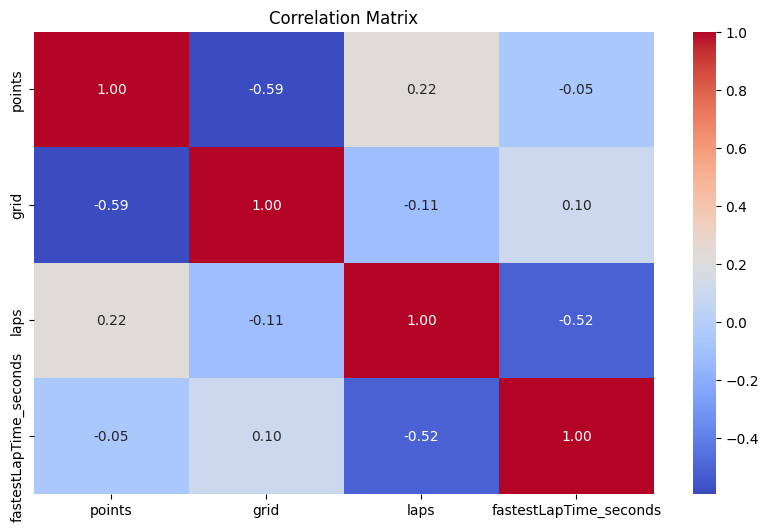

In [19]:
# Calculatr the correlation matrix
correlation_matrix = correlation_df[['points', 'grid', 'laps', 'fastestLapTime_seconds']].corr()

# Plot the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')

plt.show()

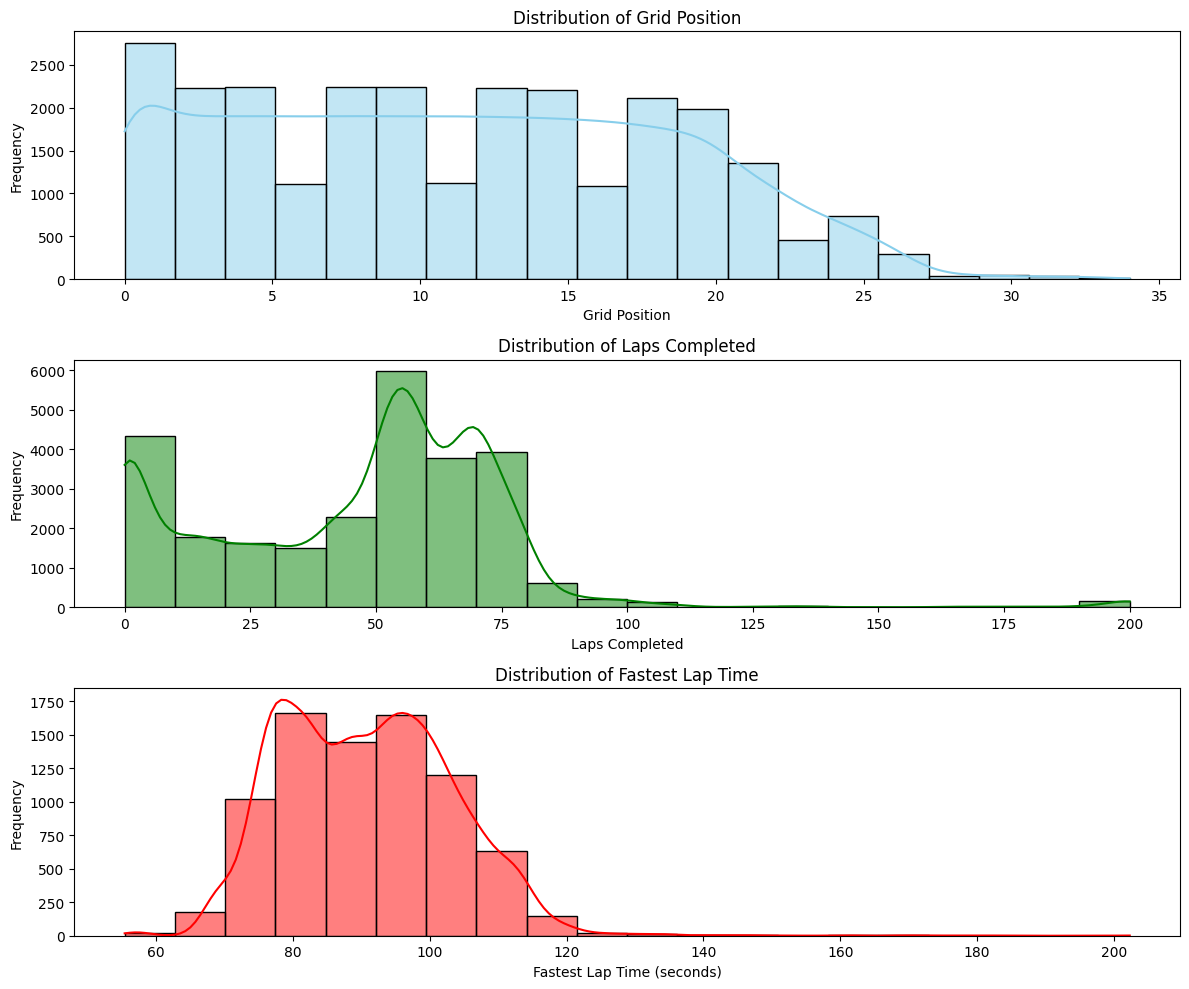

In [20]:
# Plot distributions of key features
plt.figure(figsize=(12, 10))

# Distribution of grid position
plt.subplot(3, 1, 1)
sns.histplot(driver_performance_df['grid'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Grid Position')
plt.xlabel('Grid Position')
plt.ylabel('Frequency')

# Distribution of laps completed
plt.subplot(3, 1, 2)
sns.histplot(driver_performance_df['laps'], bins=20, kde=True, color='green')
plt.title('Distribution of Laps Completed')
plt.xlabel('Laps Completed')
plt.ylabel('Frequency')

# Distribution of fastest lap time (in seconds)
plt.subplot(3, 1, 3)
sns.histplot(driver_performance_df['fastestLapTime_seconds'], bins=20, kde=True, color='red')
plt.title('Distribution of Fastest Lap Time')
plt.xlabel('Fastest Lap Time (seconds)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Baseline with Linear Regression and Random Forest Regressor

In [21]:
# Drop rows with missing values for model training
model_df = driver_performance_df.dropna(subset=['points', 'grid', 'laps', 'fastestLapTime_seconds'])

# Select features and target variable
x = model_df[['grid', 'laps', 'fastestLapTime_seconds']]
y = model_df['points']

# Split the data into training and testing data sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
# Initialize the models
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)

In [23]:
# Train the models
lr.fit(x_train, y_train)
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [24]:
# Make predictions on the testing data set
yhat_lr = lr.predict(x_test)
yhat_rf = rf.predict(x_test)

In [42]:
# Evaluate the models
mae_lr = mean_absolute_error(y_test, yhat_lr)
mse_lr = mean_squared_error(y_test, yhat_lr)
r2_lr = r2_score(y_test, yhat_lr)

mae_rf = mean_absolute_error(y_test, yhat_rf)
mse_rf = mean_squared_error(y_test, yhat_rf)
r2_rf = r2_score(y_test, yhat_rf)

print(' Logistic Regression: \n\tMean Absolute Error -', mae_lr,
      '\n\tR2 Score            -', r2_lr,
      '\n Random Forest Regressor: \n\tMean Absolute error -', mae_rf,
      '\n\tR2 Score            -', r2_rf)

 Logistic Regression: 
	Mean Absolute Error - 2.426651122432471 
	R2 Score            - 0.2697103740276584 
 Random Forest Regressor: 
	Mean Absolute error - 1.4775938725666369 
	R2 Score            - 0.5476651789032826


# Feature Engineering

In [27]:
# Calculate driver experience (number of races participated in up to the current race)
driver_performance_df['race_date'] = pd.to_datetime(driver_performance_df['raceId'].map(races_df.set_index('raceId')['date']))
driver_performance_df = driver_performance_df.sort_values(by=['driverId', 'race_date'])

In [31]:
# Group by driver ID and calculate the cumulative count of races for each driver
driver_performance_df['driver_experience'] = driver_performance_df.groupby('driverId').cumcount()

# Drop the race date column as it is no longer needed
driver_performance_df = driver_performance_df.drop(columns=['race_date'])

In [32]:
# Select features and target variables, including driver experience
x = driver_performance_df[['grid', 'laps', 'fastestLapTime_seconds', 'driver_experience']]
y = driver_performance_df['points']

# Impute missing values with the median
imputer = SimpleImputer(strategy='median')
x_imputed = imputer.fit_transform(x)

In [33]:
# Split the imputed data into training and testing data sets
x_train, x_test, y_train, y_test = train_test_split(x_imputed, y, test_size=0.2, random_state=42)

# Re-initialize the models with the imputed data
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)

# Train the models
lr.fit(x_train, y_train)
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [34]:
# Make predictions on the test data set
yhat_lr = lr.predict(x_test)
yhat_rf = rf.predict(x_test)

In [90]:
# Evaluate the models
mae_lr = mean_absolute_error(y_test, yhat_lr)
mse_lr = mean_squared_error(y_test, yhat_lr)
r2_lr = r2_score(y_test, yhat_lr)

mae_rf = mean_absolute_error(y_test, yhat_rf)
mse_rf = mean_squared_error(y_test, yhat_rf)
r2_rf = r2_score(y_test, yhat_rf)

print('\033[1mModel: Logistic Regression\033[0m',
      '\n\033[1mMean Absolute Error -\033[0m', mae_lr,
      '\n\033[1mR2 Score            -\033[0m', r2_lr,
      '\n\033[1mModel: Random Forest Regressor\033[0m',
      '\n\033[1mMean Absolute error -\033[0m', mae_rf,
      '\n\033[1mR2 Score            -\033[0m', r2_rf)

Model: Logistic Regression 
Mean Absolute Error - 2.426651122432471 
R2 Score            - 0.2697103740276584 
Model: Random Forest Regressor 
Mean Absolute error - 1.4775938725666369 
R2 Score            - 0.5476651789032826


# Race Outcome Prediction

## Baseline with Logistic Regression

Predicting top 3 finishes

In [45]:
# Create a binary target variable: 1 if the driver finished with a podium, 0 otherwise
driver_performance_df['podium'] = driver_performance_df['positionOrder'].isin([1, 2, 3]).astype(int)

# Select features and binary target variables
x_class = driver_performance_df[['grid', 'laps', 'fastestLapTime_seconds', 'driver_experience']]
y_class = driver_performance_df['podium']

# Impute missing values with the median
imputer = SimpleImputer(strategy='median')
x_class_imputed = imputer.fit_transform(x_class)

In [46]:
# Split the data into training and testing data sets
x_class_train, x_class_test, y_class_train, y_class_test = train_test_split(x_class_imputed, y_class, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
lr_class = LogisticRegression()

# Train the model
lr_class.fit(x_class_train, y_class_train)

# Make predictions on the testing data set
yhat_lr_class = lr_class.predict(x_class_test)

In [96]:
# Evaluate the model
accuracy = accuracy_score(y_class_test, yhat_lr_class)
precision = precision_score(y_class_test, yhat_lr_class)
recall = recall_score(y_class_test, yhat_lr_class)
f1 = f1_score(y_class_test, yhat_lr_class)
confusion = confusion_matrix(y_class_test, yhat_lr_class)
report = classification_report(y_class_test, yhat_lr_class)

print('\033[1mModel    : Logistic Regression\033[0m',     # '\033[1m.....\033[0m' prints the output in bold letters
      '\n\033[1mAccuracy :\033[0m', accuracy,
      '\n\033[1mPrecision:\033[0m', precision,
      '\n\033[1mRecall   :\033[0m', recall,
      '\n\033[1mF1 Score :\033[0m', f1,
      '\n\033[1mConfusion Matrix:\033[0m\n', confusion,
      '\n\033[1mClassification Report:\033[0m\n', report)

Model    : Logistic Regression 
Accuracy : 0.900377358490566 
Precision: 0.6869158878504673 
Recall   : 0.4273255813953488 
F1 Score : 0.5268817204301075 
Confusion Matrix:
 [[4478  134]
 [ 394  294]] 
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      4612
           1       0.69      0.43      0.53       688

    accuracy                           0.90      5300
   macro avg       0.80      0.70      0.74      5300
weighted avg       0.89      0.90      0.89      5300



## Random Forest and XGBoost

In [61]:
# Initialize the Random Forest and XGBoost classifiers
rf_class = RandomForestClassifier(random_state=42)
xgb_class = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the Random Forest model
rf_class.fit(x_class_train, y_class_train)

# Make predictions on the testing data set
yhat_rf_class = rf_class.predict(x_class_test)

# Train the XGBoost model
xgb_class.fit(x_class_train, y_class_train)

# Make predictions on the testing data set
yhat_xgb_class = xgb_class.predict(x_class_test)

In [62]:
# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_class_test, yhat_rf_class)
precision_rf = precision_score(y_class_test, yhat_rf_class)
recall_rf = recall_score(y_class_test, yhat_rf_class)
f1_rf = f1_score(y_class_test, yhat_rf_class)
confusion_rf = confusion_matrix(y_class_test, yhat_rf_class)
report_rf = classification_report(y_class_test, yhat_rf_class)

# Evalute the XGBoost model
accuracy_xgb = accuracy_score(y_class_test, yhat_xgb_class)
precision_xgb = precision_score(y_class_test, yhat_xgb_class)
recall_xgb = recall_score(y_class_test, yhat_xgb_class)
f1_xgb = f1_score(y_class_test, yhat_xgb_class)
confusion_xgb = confusion_matrix(y_class_test, yhat_xgb_class)
report_xgb = classification_report(y_class_test, yhat_xgb_class)

In [101]:
# Collect and display all the results
print('\033[1mModel    : Random Forest\033[0m',
      '\n\033[1mAccuracy :\033[0m', accuracy_rf,
      '\n\033[1mPrecision:\033[0m', precision_rf,
      '\n\033[1mRecall   :\033[0m', recall_rf,
      '\n\033[1mF1 Score :\033[0m', f1_rf,
      '\n\033[1mConfusion Matrix:\033[0m\n', confusion_rf,
      '\n\033[1mClassification Report:\033[0m\n', report_rf)

print('\033[1mModel    : XGBoost\033[0m',
      '\n\033[1mAccuracy :\033[0m', accuracy_xgb,
      '\n\033[1mPrecision:\033[0m', precision_xgb,
      '\n\033[1mRecall   :\033[0m', recall_xgb,
      '\n\033[1mF1 Score :\033[0m', f1_xgb,
      '\n\033[1mConfusion Matrix:\033[0m\n', confusion_xgb,
      '\n\033[1mClassification Report:\033[0m\n', report_xgb)

Model    : Random Forest 
Accuracy : 0.9018867924528302 
Precision: 0.6555555555555556 
Recall   : 0.5145348837209303 
F1 Score : 0.5765472312703582 
Confusion Matrix:
 [[4426  186]
 [ 334  354]] 
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94      4612
           1       0.66      0.51      0.58       688

    accuracy                           0.90      5300
   macro avg       0.79      0.74      0.76      5300
weighted avg       0.89      0.90      0.90      5300

Model    : XGBoost 
Accuracy : 0.9066037735849056 
Precision: 0.6817325800376648 
Recall   : 0.5261627906976745 
F1 Score : 0.5939294503691551 
Confusion Matrix:
 [[4443  169]
 [ 326  362]] 
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      4612
           1       0.68      0.53      0.59       688

    accuracy                           0.91      5300
   macro avg       

---
We have improved the overall performance with XGBoost

---